In [17]:
import numpy as np
import matplotlib.pyplot as plt


The goal of the notebook is to evaluate and characterize the following integral:


$$
integral(j,radius) = \int_{\Gamma} \left(\frac{z}{w(t)}\right)^j \frac{dw}{w}
$$

where our origin is centered $r$ away from $z$ on the interior $D_{-}$. 


For the specific case of the notebook we choose an a=3,b=2, ellipse, 
and our target is located at $(3,0)$

In [18]:
#Geometry Setup
def shape_ellipse(t,a=3,b=2):
    return np.array([a*np.cos(t),b*np.sin(t)])
def tangent_derivative(t,a=3,b=2):
    return np.linalg.norm(np.array([-a*np.sin(t),b*np.cos(t)]),axis=0)


#Define Qaudrature Points (Trapezoid)
N = 64
#x = np.polynomial.legendre.leggauss(N)
points = np.array([2*np.pi*i/N for i in range(N)]) -  np.pi #x[0]
weights = np.array([2*np.pi/N for i in range(N)])#x[1]

In [19]:
#Check That Tangent Derivatives Give Arc-Length, Arc-Length Approx 15.87
np.sum(tangent_derivative(points)*weights) 

15.865439589290588

In [20]:
#Define Integrand
def f(t,j,radius=0.1):
    origin = np.array([3-radius, 0])
    return radius**j/np.linalg.norm(shape_ellipse(t) - origin[:,None],axis=0)**(j+1)

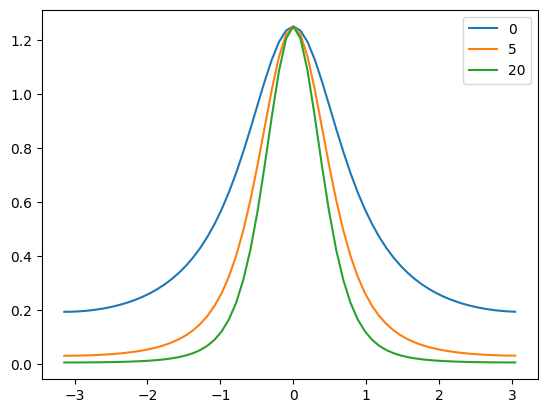

In [34]:
#Plot Integrand for a few orders:
plt.plot(points, f(points, 0, radius = 0.8), label='0')
plt.plot(points, f(points, 1, radius = 0.8), label='5')
plt.plot(points, f(points, 2, radius = 0.8), label='20')
plt.legend()
plt.show()

In [35]:
#Integrate integrand for N orders at a given radius
def integrate(N,radius,start=0):
    decay_behavior = []
    for i in range(start, start+N):
        integrand = f(points,i,radius) * tangent_derivative(points)
        integral = np.sum(integrand*weights) 
        decay_behavior.append(integral)
    return decay_behavior

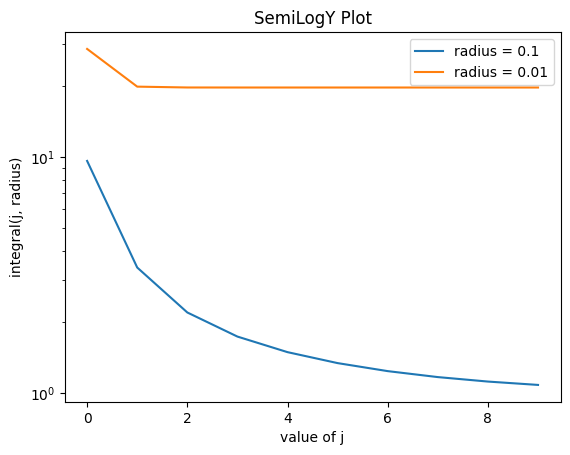

In [43]:
#Plot Integral as Function of j, for radius = 0.1/0.001, 10 orders
N = 10
plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.2)),label="radius = 0.1")
plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.01)),label="radius = 0.01")
#plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.1,100)),label="start=100,radius = 0.1")
#plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.01,200)),label="start=100,radius = 0.01")

plt.legend()
plt.xlabel("value of j")
plt.ylabel("integral(j, radius)")
plt.title("SemiLogY Plot")
plt.show()

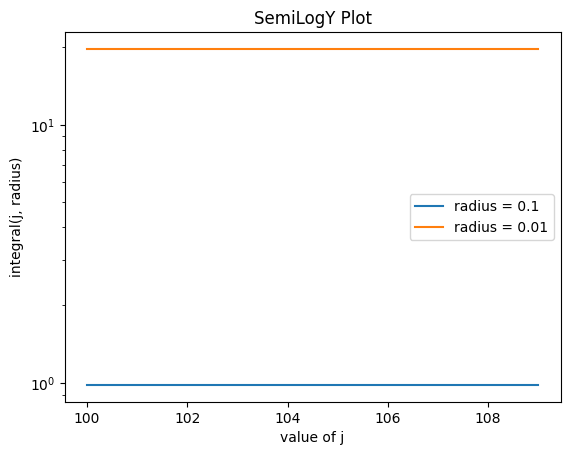

In [44]:
#Plot Integral as Function of j, for radius = 0.1/0.001, 10 orders around 100
N = 10
plt.semilogy(np.array([100+i for i in range(N)]),np.array(integrate(N,0.2,100)),label="radius = 0.1")
plt.semilogy(np.array([100+i for i in range(N)]),np.array(integrate(N,0.01,100)),label="radius = 0.01")
#plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.1,100)),label="start=100,radius = 0.1")
#plt.semilogy(np.array([i for i in range(N)]),np.array(integrate(N,0.01,200)),label="start=100,radius = 0.01")

plt.legend()
plt.xlabel("value of j")
plt.ylabel("integral(j, radius)")
plt.title("SemiLogY Plot")
plt.show()

In [45]:
"It seems pretty clear something is awry in the forwards bound."

'It seems pretty clear something is awry in the forwards bound.'